# Multivariate Interpolation

In [1]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

In [2]:
import numpy as np
from numpy import polynomial as P
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy import linalg

### Regular grid

In [3]:
x = y = np.linspace(-2, 2, 10)

In [4]:
def f(x, y):
    return np.exp(-(x + .5)**2 - 2*(y + .5)**2) - np.exp(-(x - .5)**2 - 2*(y - .5)**2)

In [5]:
X, Y = np.meshgrid(x, y)

In [6]:
# simulate noisy data at fixed grid points X, Y
Z = f(X, Y) + 0.05 * np.random.randn(*X.shape)

In [7]:
f_interp = interpolate.interp2d(x, y, Z, kind='cubic')

In [8]:
xx = yy = np.linspace(x.min(), x.max(), 100)

In [9]:
ZZi = f_interp(xx, yy)
print (ZZi)

[[ 0.05441007  0.06185203  0.06719159 ... -0.03511337 -0.04652549
  -0.06149238]
 [ 0.02262977  0.0257406   0.02776414 ... -0.02864094 -0.03156708
  -0.03621806]
 [-0.00443472 -0.00454907 -0.0049581  ... -0.02318838 -0.01887082
  -0.01466876]
 ...
 [-0.0098775   0.00729891  0.02089422 ... -0.01662121  0.02047807
   0.06480296]
 [-0.01664784  0.00353708  0.01989078 ... -0.0137956   0.018392
   0.05679447]
 [-0.02503853 -0.00163638  0.01772505 ... -0.01038381  0.01529542
   0.0458564 ]]


In [10]:
XX, YY = np.meshgrid(xx, yy)

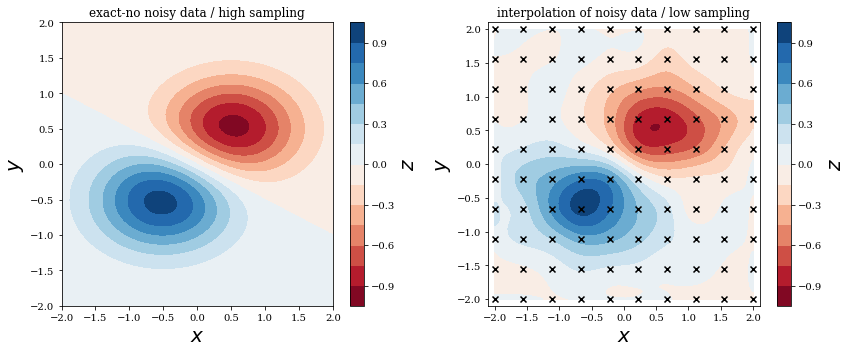

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact-no noisy data / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)
fig.tight_layout()

In [12]:
# We increase the sampling
x = y    = np.linspace(-2, 2, 20)
X, Y     = np.meshgrid(x, y)
Z        = f(X, Y) + 0.05 * np.random.randn(*X.shape)
f_interp = interpolate.interp2d(x, y, Z, kind='cubic')

xx = yy  = np.linspace(x.min(), x.max(), 1000)
ZZi      = f_interp(xx, yy)
XX, YY   = np.meshgrid(xx, yy)

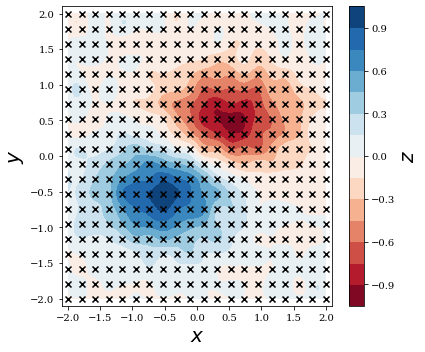

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

c = ax.contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
ax.set_ylim(-2.1, 2.1)
ax.set_xlim(-2.1, 2.1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.scatter(X, Y, marker='x', color='k')
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()

### Irregular grid

In [14]:
np.random.seed(115925231)

In [15]:
x = y = np.linspace(-1, 1, 100)

In [16]:
X, Y = np.meshgrid(x, y)

In [17]:
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

In [18]:
Z = f(X, Y)

In [19]:
N = 250

In [20]:
xdata = np.random.uniform(-1, 1, N)

In [21]:
ydata = np.random.uniform(-1, 1, N)

In [22]:
zdata = f(xdata, ydata) 
Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')

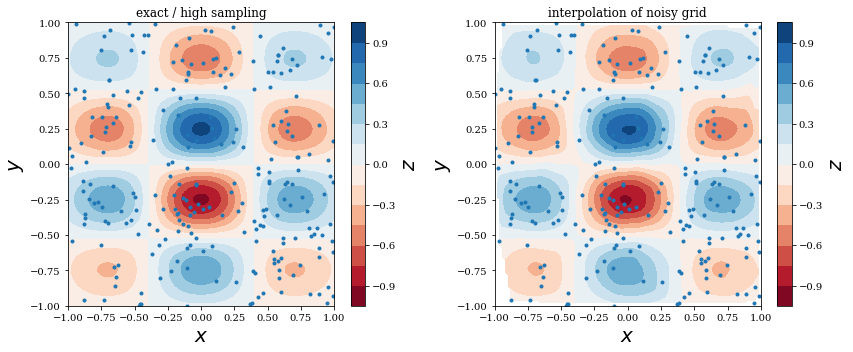

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
c = axes[0].contourf(X, Y, Z, 15, cmap=plt.cm.RdBu)
axes[0].set_ylim(-1, 1)
axes[0].set_xlim(-1, 1)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
axes[0].scatter(xdata, ydata, marker='.')
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-1, 1)
axes[1].set_xlim(-1, 1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(xdata, ydata, marker='.')
axes[1].set_title("interpolation of noisy grid")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()

In [24]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

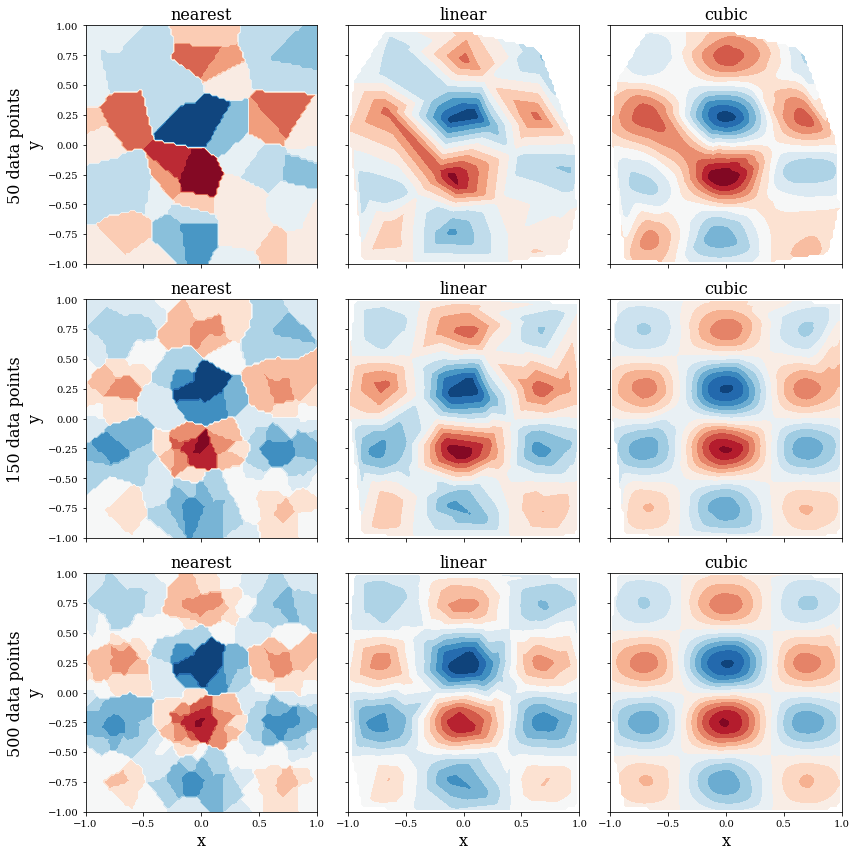

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)
    
fig.tight_layout()
